# Credit Card Fraud Detection

## Set up Colab Environment
Install and import all the required libraries.
Colab environment should have them already, but just in case!

In [1]:
# Bare basics
!pip install numpy pandas matplotlib seaborn scikit-learn pandas-profiling



In [2]:
# Feature engineering
!pip install featuretools Boruta

     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for Boruta: filename=Boruta-0.3-cp27-none-any.whl size=56629 sha256=16c512dde3263581a6755842163137ade8e1841c52bba35f9974bfc49a9727b7
  Stored in directory: /root/.cache/pip/wheels/0f/66/0d/8af2055a5c76271126bb55aecea937fb5d69a3fafd163a04b5
Successfully built Boruta


In [0]:
#Data Mining and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Feature selection
from boruta import BorutaPy as bp

In [0]:
# Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix

import os
import sys
import shutil
# if in Google Colaboratory
try:
    from google.colab import drive
except:
    pass
  
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Configure Pandas Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
# Since I am running this notebook on Colab, 
# Let's try and get some system information 
import platform
print('System Processor: ', platform.processor(), '\n')
!nvidia-smi

('System Processor: ', 'x86_64', '\n')
Sun Sep 22 22:05:28 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                     

# Load the Dataset
Mount the gDrive and load the dataset from there.
Loading dataset inside the Colab is taking forever!

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
filepath = '/content/drive/My Drive/siraj_week3/'

print('Loading the Dataset...')

print('Train Transaction')
df_train_transaction = pd.read_csv(filepath + 'train_transaction.csv')
display(df_train_transaction.shape)

print('Train Identity')
df_train_identity = pd.read_csv(filepath + 'train_identity.csv')
display(df_train_identity.shape)

print('Test Transaction')
df_test_transaction = pd.read_csv(filepath + 'test_transaction.csv')
display(df_test_transaction.shape)

print('Test Identity')
df_test_identity = pd.read_csv(filepath + 'test_identity.csv')
display(df_test_identity.shape)

print('DONE!')

Loading the Dataset...
Train Transaction


(590540, 394)

Train Identity


(144233, 41)

Test Transaction


(506691, 393)

Test Identity


(141907, 41)

DONE!


In [12]:
display(df_train_transaction.sample(5))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
48477,3035477,0,1145967,169.950,W,7919,194.0,150.0,mastercard,202.0,debit,337.0,87.0,5.0,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,2.0,23.0,23.0,12.0,42.0,12.0,NaN,NaN,NaN,NaN,42.0,42.0,NaN,NaN,NaN,42.0,T,T,T,NaN,NaN,F,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,530.849976,0.0,0.0,200.899994,0.0,0.0,0.0,0.0,0.0,329.950012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,360.899994,0.0000,0.0,30.950001,0.0,0.0,30.950001,30.950001,30.950001,0.000000,0.000000,0.0000,0.0,329.950012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182995,3169995,0,4050921,117.000,W,11207,361.0,150.0,visa,226.0,debit,126.0,87.0,NaN,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,23.0,2.0,164.0,164.0,6.0,164.0,6.0,NaN,NaN,NaN,NaN,283.0,NaN,NaN,NaN,NaN,306.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.

In [12]:
display(df_test_transaction.sample(5))

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
302848,3966397,28904032,29.886,C,2825,305.0,106.0,mastercard,224.0,debit,NaN,NaN,NaN,NaN,anonymous.com,anonymous.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9.0,9.0,6.0,9.0,6.0,9.0,6.0,NaN,NaN,0.0,NaN,9.0,0.0,NaN,9.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0,3.0,1.0,0.000000,108.819603,34.428799,0.0,74.390800,0.0,0.0,9.9598,74.390800,74.3908,0.000000,17.214399,17.214399,0.000000,17.214399,17.214399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367086,4030635,30926527,9.591,C,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,112.0,anonymous.com,anonymous.com,4.0,12.0,0.0,3.0,0.0,3.0,3.0,4.0,0.0,7.0,4.0,4.0,7.0,3.0,179.0,179.0,50.0,180.0,179.0,180.0,179.0,127.916664,0.916666,0.0,NaN,180.0,0.0,0.0,50.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [14]:
display(df_train_identity.sample(5))

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
5242,3008077,0.0,145286.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,43.0,NaN,Found,Found,225.0,NaN,153.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome generic,NaN,NaN,NaN,F,F,T,T,mobile,Moto G (5) Build/NPP25.137-82
97020,3339626,-40.0,48207.0,NaN,NaN,17.0,-83.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,0.0,New,NotFound,157.0,13.0,107.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 7,ie 11.0 for desktop,24.0,NaN,match_status:2,T,F,T,T,desktop,Trident/7.0
3886,3003698,-20.0,198588.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,93.550003,NotFound,49.0,NaN,Unknown,NaN,225.0,NaN,153.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,firefox,NaN,NaN,NaN,F,F,F,T,desktop,rv:49.0
128189,3505383,-5.0,540491.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,64.0,NaN,Found,Found,225.0,NaN,427.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome generic for android,NaN,NaN,NaN,F,F,T,F,mobile,LG-X230 Build/MRA58K
30161,3066232,-5.0,49399.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,-300.0,Found,Found,166.0,NaN,193.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 7,chrome 63.0,24.0,1360x768,match_status:2,T,F,T,F,desktop,Windows


In [17]:
display(df_test_identity.sample(5))

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
37642,3869983,-5.0,100098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-420.0,Found,Found,166.0,NaN,542.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.1,mobile safari 11.0,32.0,2436x1125,match_status:2,T,F,F,F,mobile,iOS Device
61854,3965674,-20.0,330630.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,NaN,384.0,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 60.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M Build/MMB29K
29601,3825821,-5.0,120261.0,NaN,NaN,24.0,-20.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,13.0,525.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.1,mobile safari 11.0,32.0,1334x750,match_status:2,T,F,F,F,mobile,iOS Device
105683,4103560,-45.0,182628.0,0.0,0.0,13.0,-23.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,417.0,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 70.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Redmi Note 6 Pro
115419,4122647,-5.0,139015.0,NaN,NaN,0.0,-9.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,NaN,286.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 12.1.0,mobile safari 12.0,32.0,1334x750,match_status:2,T,F,F,F,mobile,iOS Device


Notice that in the above samples, the 'test...' datasets are missing the isFraud column.
Thereform, we will only be using the 'Train' dataset for both testing and training our logistic regression.

However, first we need to combine the "traintransaction" and "trainidenity" datasets.

In [13]:
df_dataset = df_train_transaction.merge(df_train_identity, how='outer', on='TransactionID')
print(df_train_transaction.shape)
print(df_dataset.shape)

(590540, 394)
(590540, 434)


In [14]:
df_dataset.sample(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
371245,3358245,0,9235366,1905.950,W,13844,583.0,150.0,visa,226.0,credit,330.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463285,3450285,0,11914598,60.000,W,12308,360

In [21]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [0]:
# Free the RAM
df_train_transaction = None
df_train_identity = None
df_test_transaction = None
df_test_identity = None

# Exploratory Data Analysis

Let's check out what we got in this dataset

In [16]:
# Explore each column
for col, values in df_dataset.iteritems():
  num_uniques = values.nunique()
  print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
  if values.dtype != str and values.dtype != object:
    print (values.max(), values.min())
  print ('\n')

TransactionID: 590540
(3577539, 2987000)


isFraud: 2
(1, 0)


TransactionDT: 573349
(15811131, 86400)


TransactionAmt: 20902
(31937.391, 0.251)


ProductCD: 5


card1: 13553
(18396, 1000)


card2: 500
(600.0, 100.0)


card3: 114
(231.0, 100.0)


card4: 4


card5: 119
(237.0, 100.0)


card6: 4


addr1: 332
(540.0, 100.0)


addr2: 74
(102.0, 10.0)


dist1: 2651
(10286.0, 0.0)


dist2: 1751
(11623.0, 0.0)


P_emaildomain: 59


R_emaildomain: 60


C1: 1657
(4685.0, 0.0)


C2: 1216
(5691.0, 0.0)


C3: 27
(26.0, 0.0)


C4: 1260
(2253.0, 0.0)


C5: 319
(349.0, 0.0)


C6: 1328
(2253.0, 0.0)


C7: 1103
(2255.0, 0.0)


C8: 1253
(3331.0, 0.0)


C9: 205
(210.0, 0.0)


C10: 1231
(3257.0, 0.0)


C11: 1476
(3188.0, 0.0)


C12: 1199
(3188.0, 0.0)


C13: 1597
(2918.0, 0.0)


C14: 1108
(1429.0, 0.0)


D1: 641
(640.0, 0.0)


D2: 641
(640.0, 0.0)


D3: 649
(819.0, 0.0)


D4: 808
(869.0, -122.0)


D5: 688
(819.0, 0.0)


D6: 829
(873.0, -83.0)


D7: 597
(843.0, 0.0)


D8: 12353
(1707.7916259765625, 0.0)



From the data above we can conclude that in all the numerical fields, the
value doesn't really go below -600. Therefore, we can patch the NAN fields with -999

We are also going to patch categorical NAN with -999

In [24]:
print('Total Number of NANs = ', df_dataset.isnull().sum().sum())

('Total Number of NANs = ', 115523073)


In [0]:
df_dataset.fillna(value=-999, inplace=True)

In [18]:
print('Total Number of NANs after change = ', df_dataset.isnull().sum().sum())

('Total Number of NANs after change = ', 0)


This dataset is supposed to be an imbalanced dataset.
Let's check out how much imbalanced it actually is.

In [19]:
print('total number of transactions', df_dataset.shape[0])
print('total number of fraudulent transactions', df_dataset["isFraud"].values.sum())

print('Just ', df_dataset["isFraud"].values.sum()/df_dataset.shape[0], '% of the transactions are Fraudulent')


('total number of transactions', 590540)
('total number of fraudulent transactions', 20663)
('Just ', 0, '% of the transactions are Fraudulent')



# Balancing the Dataset - Undersampling

Only 3.5% of the total transactions are fraudulent.
The dataset is obviously imbalanced.
Let's capture all the fraud transactions and then undersample the good
transactions.


We have chosen undersampling since this dataset is huge and training
the classifier on oversampled dataset will take a huge amount of time.


In [20]:
# Separate the target column, isFraud
y = df_dataset['isFraud']
# Drop the isFraud column from the dataset df
X = df_dataset.drop(labels='isFraud', axis=1)

print(y.shape, X.shape)
display(y.sample(5))
display(X.sample(5))

((590540,), (590540, 433))


380176    0
101236    0
367929    0
125150    0
237020    0
Name: isFraud, dtype: int64

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
119665,3106665,2331505,29.00,W,6170,174.0,150.0,visa,226.0,debit,327.0,87.0,-999.0,-999.0,yahoo.com,-999,10.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,4.0,0.0,27.0,5.0,346.0,346.0,10.0,346.0,10.0,-999.0,-999.0,-999.0,-999.0,346.0,-999.0,-999.0,-999.0,-999.0,346.0,-999,-999,-999,M0,T,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,146.000000,0.000000,0.0,146.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999

In [0]:
# clear RAM
df_dataset = None

In [22]:
# Now that we have separated the target variable
# Time to undersample 
rus = RandomUnderSampler(random_state=786)
X_rus, y_rus = rus.fit_resample(X, y)

# Check
print(X_rus.shape, y_rus.shape)

((41326, 433), (41326,))


In [25]:
# Check Dataset Balance 
print('Total number of Transactions', X_rus.shape[0])
print('Total Number of Fraudulent Transactions', y_rus.sum())


('Total number of Transactions', 41326)
('Total Number of Fraudulent Transactions', 20663)



# Correlations

Let's check out correlations among various numeric fields.


In [26]:
# Extract numerical columns 
num_col_list = X.select_dtypes([np.number]).columns
display(num_col_list)



Index([u'TransactionID', u'TransactionDT', u'TransactionAmt', u'card1', u'card2', u'card3', u'card5', u'addr1', u'addr2', u'dist1',
       ...
       u'id_17', u'id_18', u'id_19', u'id_20', u'id_21', u'id_22', u'id_24', u'id_25', u'id_26', u'id_32'], dtype='object', length=402)

In [27]:
# X_rus is a numpy array 
# Recreate the undersampled dataframe 

df_X_rus = pd.DataFrame(data=X_rus,    # values
              index=X_rus[:,0],    # 1st column as index
              columns=X.columns.values)  # 1st row as the column names

df_X_rus.shape

(41326, 433)

In [28]:
df_X_rus_boruta = df_X_rus.copy()
df_X_rus.sample(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
3009100,3009100,580235,49,W,1939,360,150,visa,166,debit,226,87,-999,-999,-999,-999,4,2,0,0,2,2,0,0,2,0,4,0,4,4,0,-999,-999,-999,-999,-999,-999,-999,-999,466,-999,-999,-999,-999,0,-999,-999,-999,M1,F,T,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,2,2,0,0,0,1,1,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3038655,3038655,1210069,100,R,12065,575,150,mastercard,224,debit,123,87,-999,-999,gmail.com,gmail.com,798,880,0,593,0,602,0,363,0,314,630,0,445,405,0,-999,-999,-999,-999,-999,-999,1,0,-999,-999,-999,-999,0,-999,-999,-999,-999,-999,-999,-9

In [29]:
# Drop all columns from df_X_rus except for the numerical ones 
df_X_rus = df_X_rus[num_col_list]
# Convert all columns to numeric type (they are 'object' by default)
df_X_rus = df_X_rus.apply(pd.to_numeric) 
# Check
df_X_rus.shape

(41326, 402)



Now that our dataframe _df_Xrus only has numerical columns, let's plot the
correlation graph.


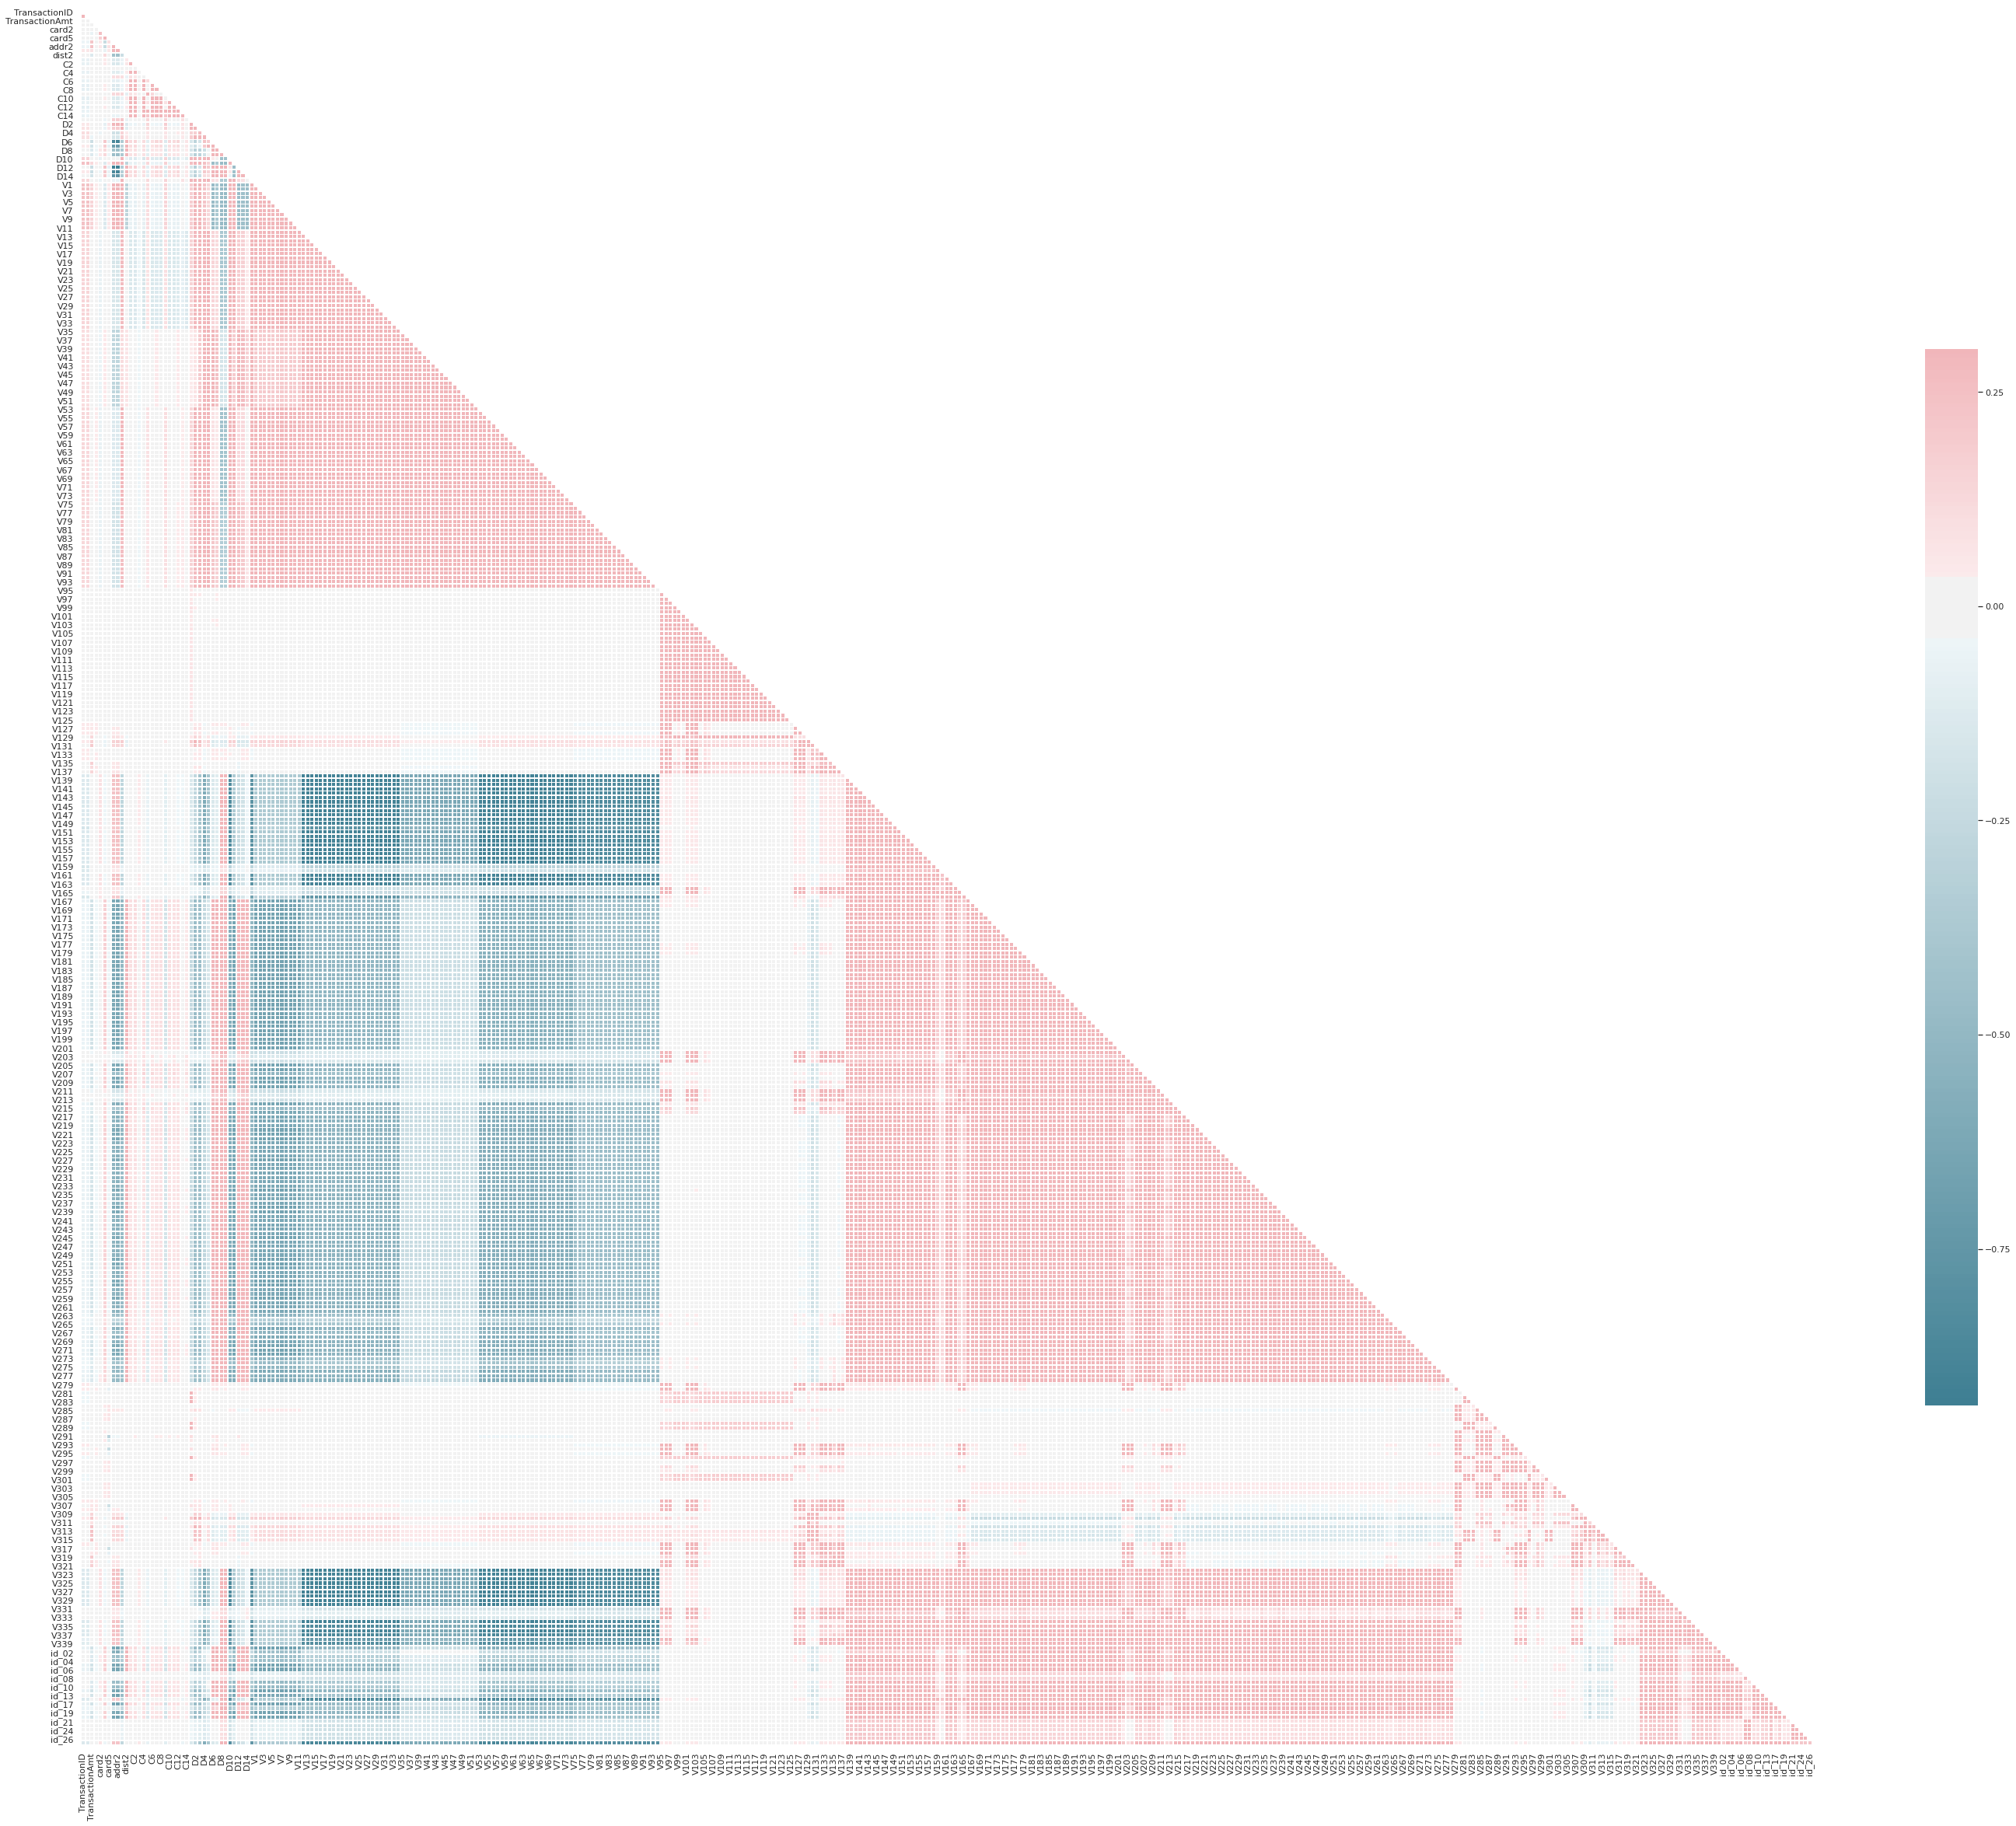

In [30]:
def sns_heatmap_diag(corr):
  """
  Plots diagonal correlation heatmap using Seaborn.  

  Parameters
  ----------
  corr : 2D numpy array    
      Correlation matrix from a pandas DF
      
  Returns
  -------
  None. Just plots the plot. 
  """
  # Set the plot style 
  sns.set(style="white")
  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(50, 50))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  # Draw the heatmap with the mask and correct aspect ratio
  try:
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
  except ValueError:
    pass
  
  return None

sns_heatmap_diag(df_X_rus.corr())




The correlation heatmap above is terrible for the eyes. (You can download the
full size image separately; find it inside the 'img' folder in the repository)

However, it shows that a lot of 'features' in the dataset are negatively(over -0.50) correlated among themselves.

# Feature Selection

Currently we have over 400 features.


Let's try Boruta Algorithm and perform feature extraction.
We will be using the algorithm to extract some meaningful features from the
Dataset.


In [0]:
# Boruta uses RandomnForestClassifier/LGBM/XGBOOST
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1,\
                             class_weight='balanced', max_depth=3)
boruta_selector = bp(rfc, n_estimators='auto', verbose=2)



In [32]:
# Start Feature Selection 
boruta_selector.fit(df_X_rus.values, y_rus)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	402
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	281
Tentative: 	121
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	281
Tentative: 	92
Rejected: 	29
Iteration: 	10 / 100
Confirmed: 	281
Tentative: 	92
Rejected: 	29
Iteration: 	11 / 100
Confirmed: 	281
Tentative: 	92
Rejected: 	29
Iteration: 	12 / 100
Confirmed: 	304
Tentative: 	69
Rejected: 	29
Iteration: 	13 / 100
Confirmed: 	304
Tentative: 	69
Rejected: 	29
Iteration: 	14 / 100
Confirmed: 	304
Tentative: 	69
Rejected: 	29
Iteration: 	15 / 100
Confirmed: 	304
Tentative: 	69
Rejected: 	29
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=885, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7fe3b6795b40>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7fe3b6795b40>,
     two_step=True, verbose=2)

In [33]:
print('==============BORUTA==============')
print(boruta_selector.n_features_)
print(boruta_selector.support_)


==============BORUTA==============
337
[ True  True  True  True  True  True  True  True  True False False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False

In [34]:
# Boruta says only 342 features are relevant 
# Extract the relevant features in a list 
selected_features = [num_col_list[i] for i, feature in \
                     enumerate(boruta_selector.support_) if feature]
print(len(selected_features))
print(selected_features)

337
['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134'

In [35]:
# Irrelevant Features 
print(set(num_col_list) - set(selected_features))

set(['id_22', 'V118', 'V119', 'V276', 'V114', 'V115', 'V116', 'V117', 'V110', 'V111', 'V112', 'V113', 'V41', 'V305', 'V89', 'V88', 'V235', 'V237', 'dist1', 'V27', 'V26', 'V25', 'V28', 'V278', 'V7', 'V1', 'V2', 'V3', 'V121', 'V120', 'V6', 'dist2', 'V8', 'V9', 'V247', 'V5', 'V260', 'V108', 'V107', 'V122', 'id_18', 'V239', 'id_07', 'C3', 'id_04', 'id_03', 'V227', 'V240', 'V241', 'V4', 'V301', 'V300', 'id_09', 'id_08', 'id_10', 'V78', 'id_21', 'V77', 'id_25', 'id_24', 'V14', 'id_26', 'V109', 'V226', 'V238'])


In [36]:
# Keep only the 'selected_features' in the Dataframe 
df_final_dataset = df_X_rus[selected_features]

df_final_dataset.shape

(41326, 337)


# Selected Features' Correlations¶

Let's check out the correlations among the selected features.




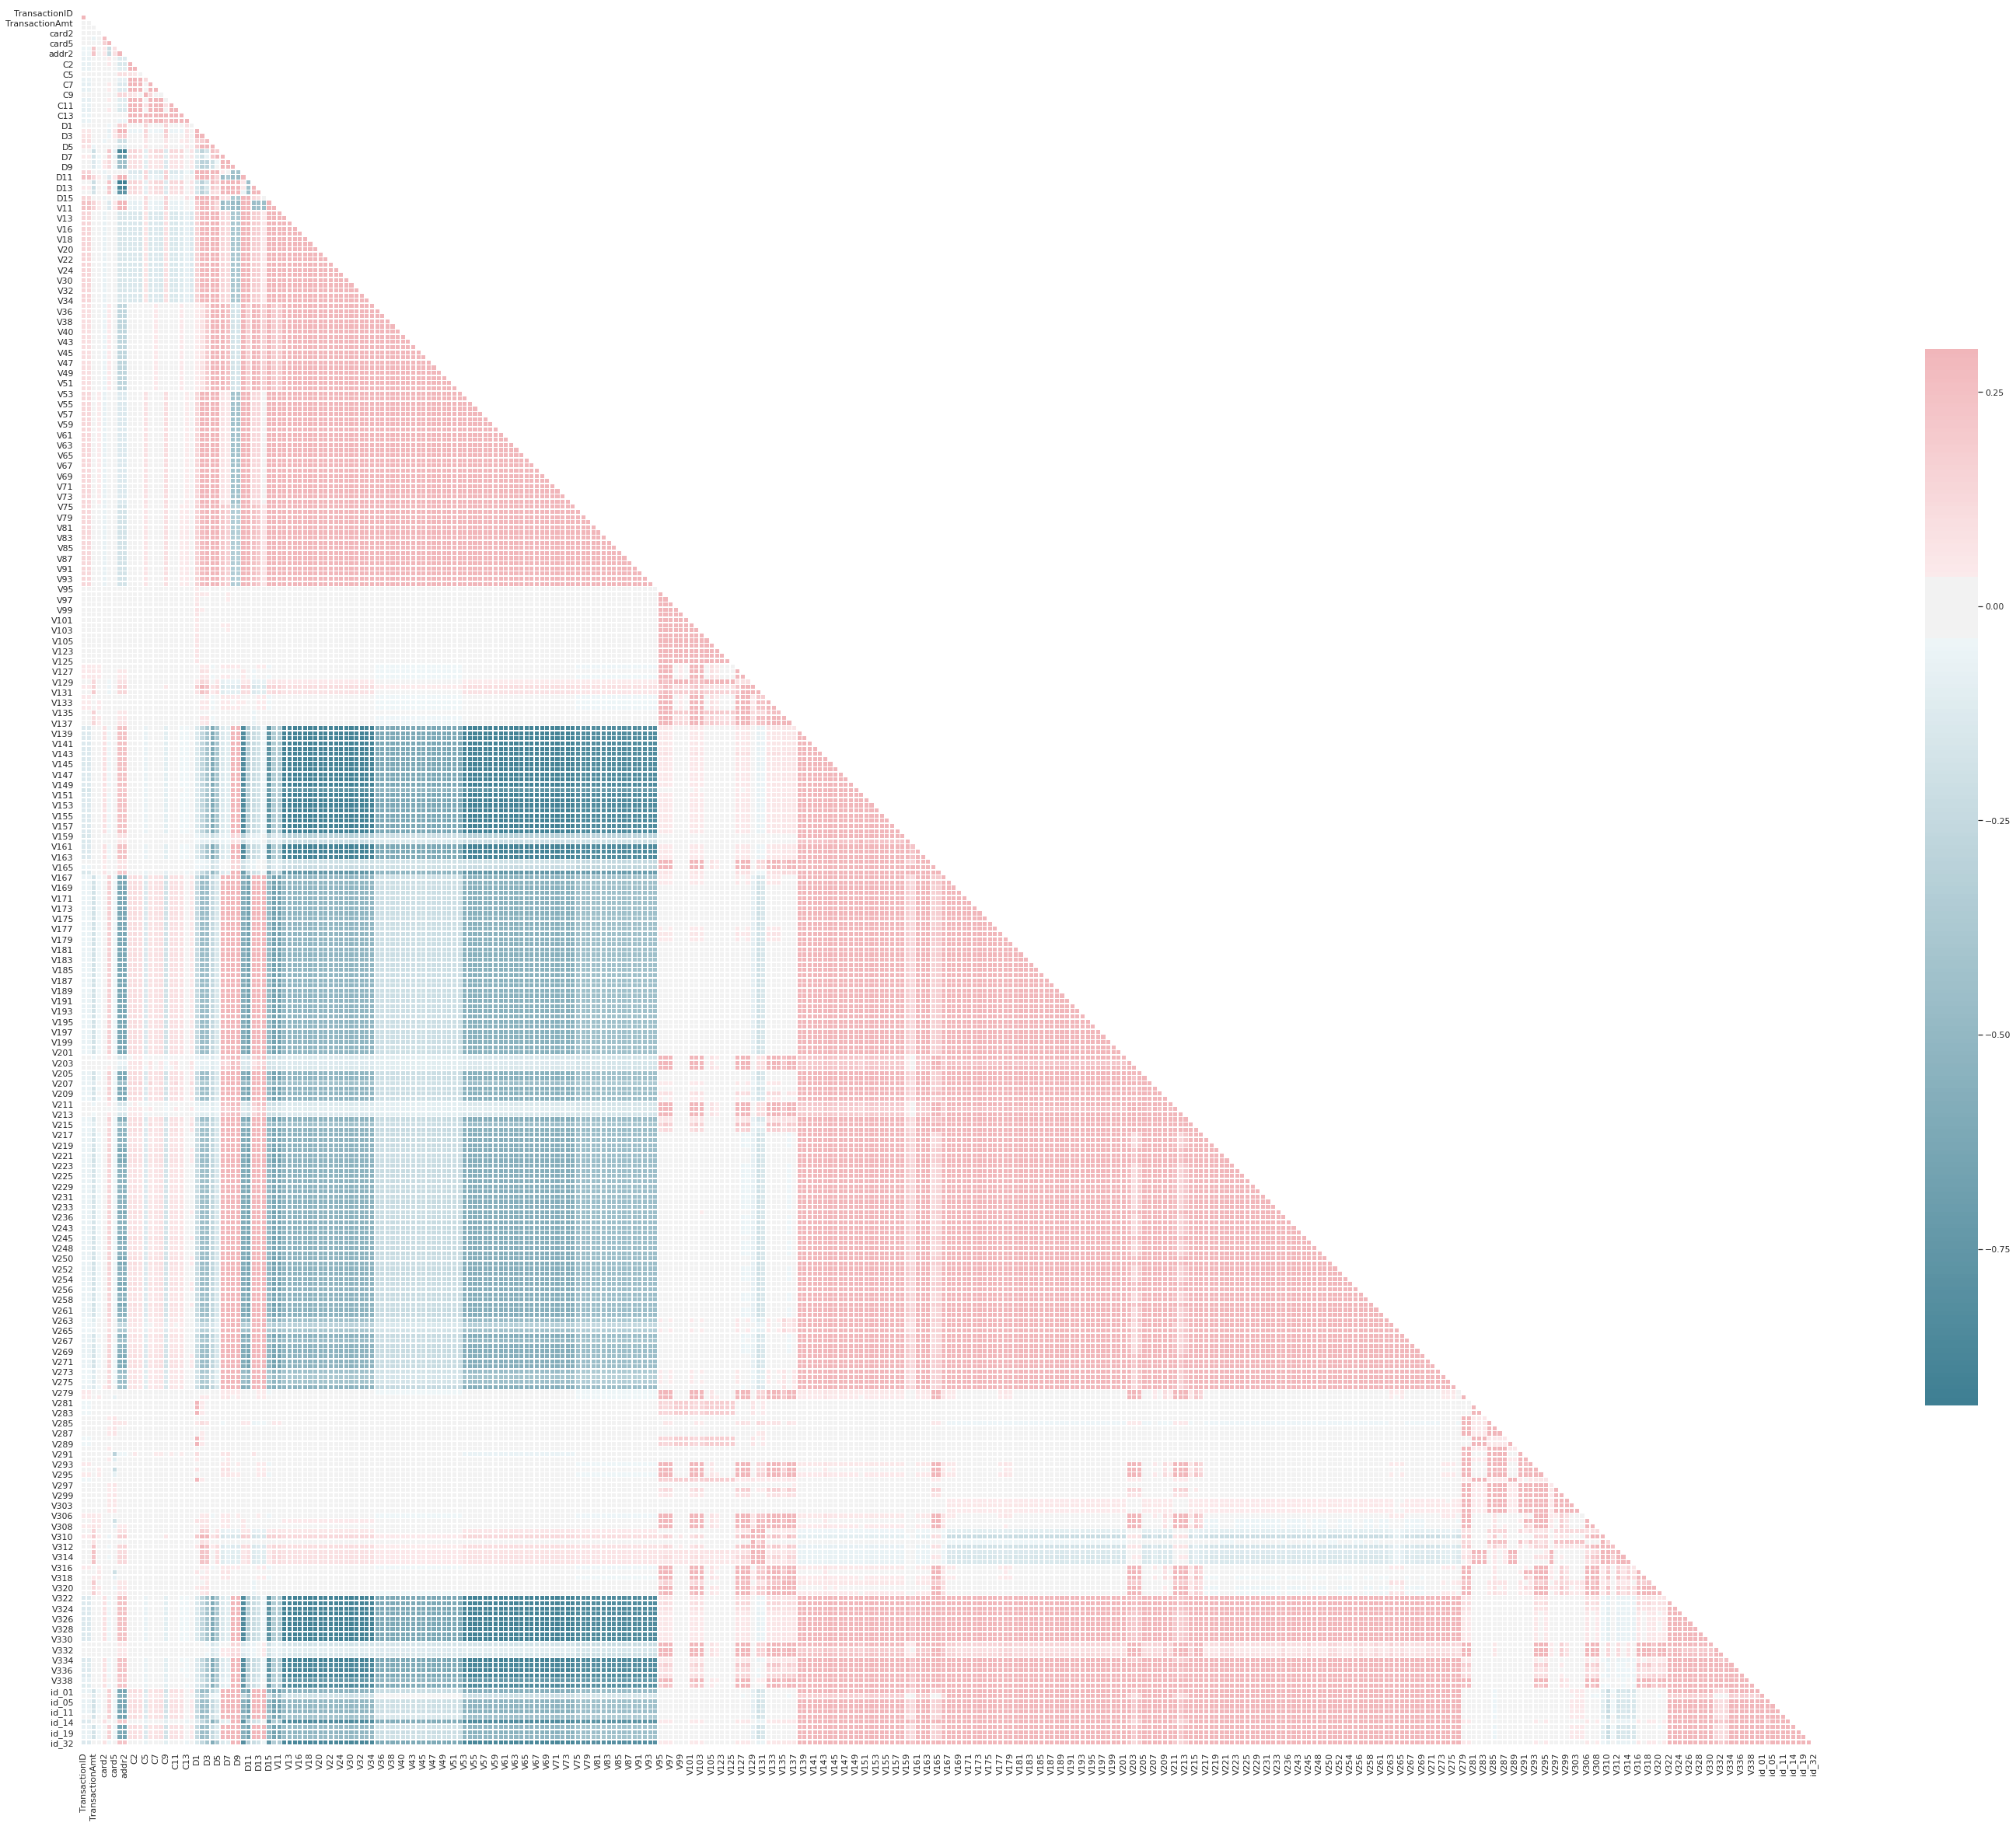

In [37]:
sns_heatmap_diag(df_final_dataset.corr())



Note that for some strange reason, Boruta algorithm has kept the
TransactionID in the features list. However, it's not supposed to have any
predictive value over the target variable.


We will be keeping all the features as recommended by the Baruta Algorithm.

# Splitting the Data

Split the final dataset into training and testing sets for the Logistic
Regression algorithm.


In [0]:
def dataset_split(df_X_dataset, np_Y_dataset, test_size):
  """
  Splits the df_dataset dataframe according to test_size.

  Parameters
  ----------
  df_X_dataset : Pandas Dataframe    
    Dataframe containing features that is going to be split.
  np_Y_dataset : Numpy 1D Array    
    Target array that is going to be split.
  test_size : Float
    A value > 0 and < , that specifies the size 
    of the testing set. 

  Returns
  -------
  X_train, X_test, y_train, y_test : np.array
    Numpy arrays of training and testing sets. 
  """
  # Ensure data sanity
  assert 0 < test_size < 1, 'Value of test_size should be between 0 & 1.'

  X = df_X_dataset
  Y = np_Y_dataset

  # Split the data for the train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)

  return X_train, X_test, y_train, y_test

In [39]:
# Split the dataset with 15% reserved for Testing
X_train, X_test, y_train, y_test = dataset_split(df_final_dataset, y_rus,\
                                                 test_size=0.15)
# Check - Train and Test shapes should match
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35127, 337)

(6199, 337)

(35127,)

(6199,)

# Logistic Regression - Train & Predict

Let's train our logistic regression algorithm on the training dataset.

In [40]:
# Train 
clf = LogisticRegression(random_state=666, solver='lbfgs',\
                         multi_class='ovr', verbose=1, n_jobs=-1)\
                         .fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.8s finished


In [0]:
# Predict 
y_pred = clf.predict(X_test)

In [42]:
# Calculate confusion matrix 
confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Get the classification report 
print(classification_report_imbalanced(y_true=y_test, y_pred=y_pred,\
                                       target_names=['Not Fraud', 'Fraud']))

                   pre       rec       spe        f1       geo       iba       sup

  Not Fraud       0.62      0.78      0.53      0.69      0.65      0.43      3043
      Fraud       0.72      0.53      0.78      0.61      0.65      0.41      3156

avg / total       0.67      0.65      0.66      0.65      0.65      0.42      6199



In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
  """
  Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

  Parameters
  ---------
  confusion_matrix: numpy.ndarray
      The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
  class_names: list
      An ordered list of class names, in the order they index the given confusion matrix.
  figsize: tuple
      A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
      the second determining the vertical size. Defaults to (10,7).
  fontsize: int
      Font size for axes labels. Defaults to 14.
      
  Returns
  -------
  matplotlib.figure.Figure
      The resulting confusion matrix figure
  """
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )
  fig = plt.figure(figsize=figsize)
  try:
      heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
      raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,\
                               ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,\
                               ha='right', fontsize=fontsize)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return fig

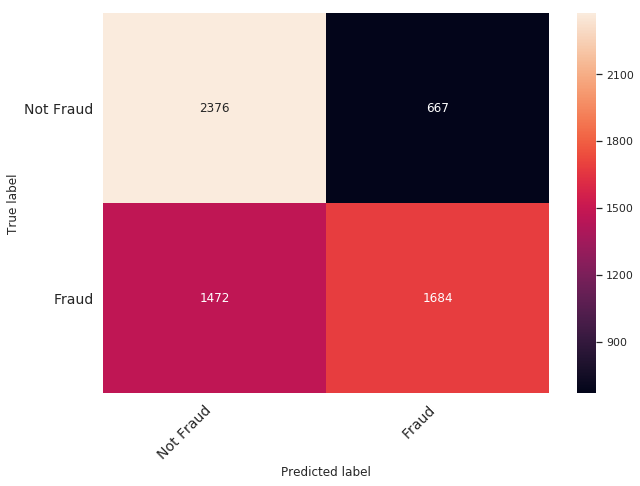

In [44]:
print_confusion_matrix(confusion_mat, ['Not Fraud', 'Fraud']);


# Conclusion

As we can see from the above metrics, our precision and recall for Fraud
is 72% and 53% respectively.
These parameters can be improved in the following ways,

    Include the non-numeric fields as well (we ignored them in this notebook).
    Engineer better features - Feature Engineering is the key!
    Try different algorithms, including neural networks.
    Finetune Hyperparameters!

